In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import seaborn as sns
 

In [57]:
df = pd.read_csv('data/clean/immoscout_only_numeric.csv')
df.head(5)

,Unnamed: 0,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,...,gde_workers_total,type,rooms,floor,living_space_m2,floor_space_m2,plot_area_m2,availability,municipality,price
0,0,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,...,331.0,penthouse,5.0,4,100.0,NaN,NaN,On request,Biberstein,1150000.0
1,1,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,...,331.0,terrace-house,5.0,NaN,156.0,242.0,222,On request,Biberstein,1420000.0
2,2,0.163362,0.095877,0.001911,47.397416,8.043150,0.0,0.0,0.0,0.334957,...,33493.0,penthouse,5.0,NaN,93.0,NaN,NaN,NaN,NaN,720000.0
3,3,0.511176,0.286451,0.090908,47.415927,8.085840,0.0,0.0,0.0,0.058298,...,331.0,detached-house,5.0,NaN,154.0,257.0,370,On request,Biberstein,1430000.0
4,4,0.333865,0.279276,0.145835,47.404870,8.052781,0.0,0.0,0.0,0.133498,...,1355.0,flat,5.0,0,142.0,NaN,NaN,On request,Küttigen,995000.0


In [58]:
x = df['living_space_m2'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)


In [59]:
np.any(np.isnan(x)), np.any(np.isnan(y))

(True, True)

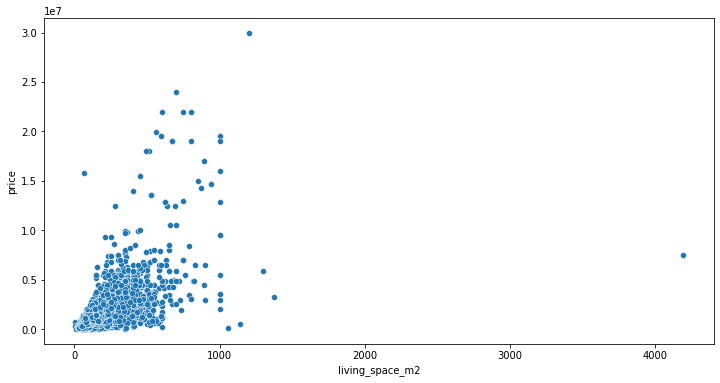

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=df, x='living_space_m2', y='price')

In [ ]:
#Lineare REgression wird berechnet
model = LinearRegression().fit(x, y)
x_new = np.arange(0,4500).reshape(-1,1)
y_new = model.predict(x_new) 

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
r_2 = model.score(x,y)
r_2

In [ ]:
#Hier sehen wir die modellierte Lineare Regression mit den Realen Anzahl Punkten
plt.scatter(x,y)
plt.plot(x_new,y_new, color = 'r')
plt.xlabel('Fläche in m2')
plt.ylabel('Preis in CHF')

In [ ]:
#Residuen werden berechnet
'''Residuentest:
1. Residuen müssen um 0 gleichverteilt sein
2. Residuen dürfen keinen systematischen Fehler aufweisen
3. Residuen müssen annährend Normalverteilt sein'''
predict= model.predict(x)
resid = y-predict 
plt.scatter(x,resid)

In [ ]:
n, bins, patches = plt.hist(resid, bins=100, facecolor='blue',stacked=True,density=True)
plt.xlabel('Residuen')
plt.ylabel('Hauefigkeiten')

mu = np.average(resid)
sigma = np.std(resid)

y_norm = norm.pdf(bins, mu, sigma)
plt.plot(bins, y_norm)
